In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'] = 'Times New Roman'
import shap
import pandas as pd
import numpy as np
import pickle
plt.rcParams['font.weight'] = 'bold'  # 모든 텍스트 요소에 대해 굵은 글씨 적용
plt.rcParams['axes.labelweight'] = 'bold'  # 축 라벨에 대해 굵은 글씨 적용

In [2]:
# Load your data
# Replace 'your_data.xlsx' with the path to your Excel file
data = pd.read_excel('/Users/kj/Library/CloudStorage/OneDrive-한림대학교/연구 및 과제/박사논문/reelim AUC.xlsx')

In [3]:
# Split the 95% CI column into two separate columns for easier plotting
data[['CI_lower', 'CI_upper']] = data['AUROC 95% CI'].str.extract(r'\((.*), (.*)\)')

# Convert these new columns to numeric type
data['CI_lower'] = pd.to_numeric(data['CI_lower'])
data['CI_upper'] = pd.to_numeric(data['CI_upper'])

# Create a figure and a set of subplots
plt.figure(figsize=(12, 8))

# Define a color map or list of colors you want to use
colors = ['#A7FBB9', '#A2CFFE', '#FFC0CB', '#BDA0CB', 'black']

# Get unique models
unique_models = data['model'].unique()

<Figure size 1200x800 with 0 Axes>

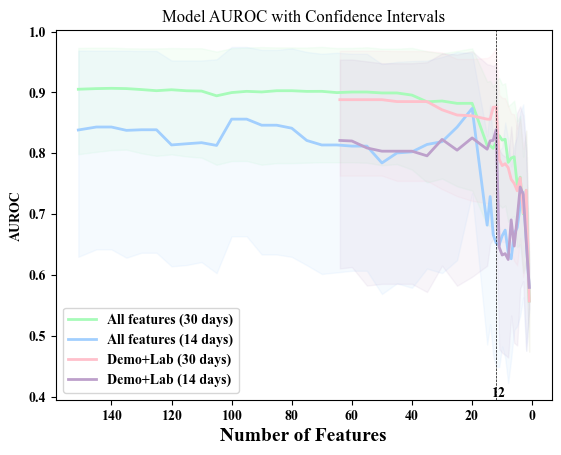

In [4]:
# Plot each model with a unique color
for i, model in enumerate(unique_models):
    # Get the subset of the data for the current model
    subset = data[data['model'] == model]
    
    # Sort the subset by the number of features (just in case the data is not sorted)
    subset = subset.sort_values('# Features', ascending=True)
    
    # Select a color from the color list
    color = colors[i % len(colors)]  # Use modulo to wrap around the color list if there are more models than colors
    
    # Plot the AUC as a line with the selected color
    plt.plot(subset['# Features'], subset['AUC'], label=model, color=color, linewidth=2)
    
    # Add the confidence interval as a shaded area
    plt.fill_between(subset['# Features'], subset['CI_lower'], subset['CI_upper'], color=color, alpha=0.1)


# Customizing the plot to match the uploaded graph's style
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('AUROC')
plt.title('Model AUROC with Confidence Intervals')
plt.legend(loc='lower left')
plt.grid(False)
plt.gca().invert_xaxis()  # Inverting x-axis to match the uploaded graph's style
plt.axvline(x=12, color='black', linestyle='--', linewidth=0.5)
plt.text(9, 0.4, '12', horizontalalignment='right')
plt.savefig('/Users/kj/Library/CloudStorage/OneDrive-한림대학교/연구 및 과제/박사논문/rescore auc.tiff', format='tiff', dpi=300)
plt.show()